In [1]:
import sklearn as skl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn.model_selection
from sklearn.model_selection import cross_val_score
import sklearn.svm as svm
from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('wholesale-customers.csv', sep=',')
df .head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
print("Percentage of Null values in each column: ")
display((df.isnull().sum()/len(df))*100) 

Percentage of Null values in each column: 


Channel             0.0
Region              0.0
Fresh               0.0
Milk                0.0
Grocery             0.0
Frozen              0.0
Detergents_Paper    0.0
Delicassen          0.0
dtype: float64

In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
X = df.iloc[:, 1: ]
y = df.iloc[:,:1]

In [6]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [7]:
y.head()

,Channel
0,2
1,2
2,2
3,1
4,2


In [8]:
y.Channel.unique()

array([2, 1])

In [9]:
transformed_y = (-1)**y

In [10]:
transformed_y.head()

,Channel
0,1
1,1
2,1
3,-1
4,1


In [11]:
#scaler = StandardScaler()

In [12]:
standardized_X_values = preprocessing.scale(X)

/Users/sumaanyumaheshwari/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [13]:
standardized_X_values

array([[ 0.59066829,  0.05293319,  0.52356777, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 0.59066829, -0.39130197,  0.54445767, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 0.59066829, -0.44702926,  0.40853771, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 0.59066829,  0.20032554,  1.31467078, ..., -0.54337975,
         2.51121768,  0.12145607],
       [ 0.59066829, -0.13538389, -0.51753572, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [ 0.59066829, -0.72930698, -0.5559243 , ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [14]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [15]:
standardized_X_values[:,1][:5]

array([ 0.05293319, -0.39130197, -0.44702926,  0.10011141,  0.84023948])

In [16]:
standardized_X = pd.DataFrame(data = standardized_X_values)

In [17]:
standardized_X.columns = X.columns.values

In [18]:
standardized_X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [19]:
#svm_poly = svm.SVC(kernel = "poly").fit(standardized_X, transformed_y)

In [20]:
#svm_poly

In [21]:
#svm_poly.degree

In [22]:
clf = svm.SVC(kernel='poly', C=1, degree = 1) 

In [23]:
clf

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
test_scores = cross_val_score(clf, standardized_X, (transformed_y), cv=10)

/Users/sumaanyumaheshwari/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sumaanyumaheshwari/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/sumaanyumaheshwari/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sumaanyumaheshwari/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarni

In [25]:
test_scores

array([0.86666667, 0.95555556, 0.93181818, 0.90909091, 0.86363636,
       0.97727273, 0.90909091, 0.88636364, 0.95348837, 0.79069767])

In [26]:
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [27]:
degrees = [0,1,2,3,4,5,6]

In [28]:
scores = []
for d in degrees:
    n_scores = cross_val_score(svm.SVC(kernel='poly', C=1, degree = d, gamma = 'scale'), standardized_X, np.ravel(transformed_y), cv = 10)
    mean_score = np.mean(n_scores)
    scores.append(mean_score) 

In [29]:
scores

[0.677307963354475,
 0.9021458773784354,
 0.7684402161146346,
 0.7956647874089734,
 0.7569708715057553,
 0.7455543810194973,
 0.7410594315245478]

In [30]:
errors = (np.array(1) - scores)

In [31]:
errors

array([0.32269204, 0.09785412, 0.23155978, 0.20433521, 0.24302913,
       0.25444562, 0.25894057])

In [32]:
best_degree = degrees[np.argmin(errors)]

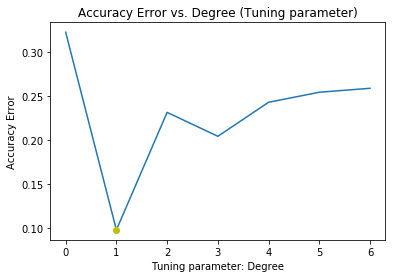

In [33]:
plt.plot(degrees, errors)
plt.plot(best_degree, min(errors), "yo")
plt.title("Accuracy Error vs. Degree (Tuning parameter)")
plt.xlabel("Tuning parameter: Degree")
plt.ylabel("Accuracy Error");

In [98]:
# Cs = np.logspace(-5,7,12)

In [97]:
# new_scores = []
# for c in Cs:
#     n_scores = cross_val_score(svm.SVC(kernel='poly', C = c, degree = 1, gamma = 'scale'), standardized_X, np.ravel(transformed_y), cv = 10)
#     mean_score = np.mean(n_scores)
#     new_scores.append(mean_score) 

In [92]:
Cs = np.logspace(-2,5,10) # -10, 0 10

In [93]:
for c in Cs:
    print(c)

0.01
0.05994842503189409
0.35938136638046275
2.1544346900318843
12.91549665014884
77.4263682681127
464.1588833612782
2782.559402207126
16681.005372000593
100000.0


In [94]:
n_scores = cross_val_score(svm.SVC(kernel='poly', C = 100000, degree = 1, gamma = 'scale'), standardized_X, np.ravel(transformed_y), cv = 10)

In [95]:
n_scores

array([0.84444444, 0.95555556, 0.95454545, 0.90909091, 0.81818182,
       0.97727273, 0.88636364, 0.90909091, 0.97674419, 0.79069767])

In [96]:
s = []
for c in Cs:
    n_scores = cross_val_score(svm.SVC(kernel='poly', C = c, degree = 1, gamma = 'scale'), standardized_X, np.ravel(transformed_y), cv = 10)
    mean_n_scores = np.mean(n_scores)
    s.append(mean_n_scores) 

In [103]:
n_errors = (np.array(1) - s)

In [108]:
best_C = Cs[np.argmin(n_errors)]

In [109]:
best_C

2.1544346900318843

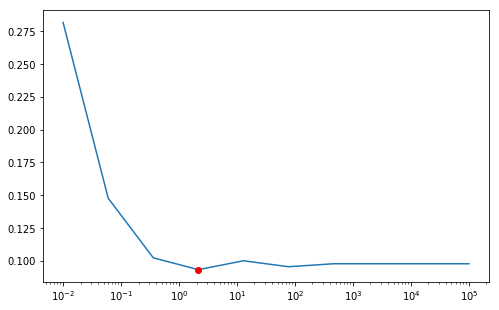

In [121]:
plt.figure(figsize=(8,5));
plt.semilogx(Cs, n_errors)
# Plot the minimum value in red which should be our chosen alpha.
plt.plot(best_C, min(n_errors), "ro", label = "min");

# plt.legend()
# plt.show()